In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data=pd.read_csv("/content/drive/MyDrive/Notebook/50_Startups.csv")
print(data.head())
print(len(data))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
50


In [44]:
print(data.shape)

(50, 5)


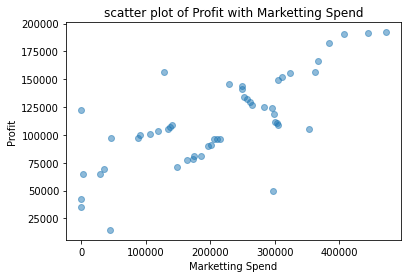

In [45]:
plt.scatter(data['Marketing Spend'], data['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with Marketting Spend')
plt.xlabel('Marketting Spend')
plt.ylabel('Profit')
plt.show()

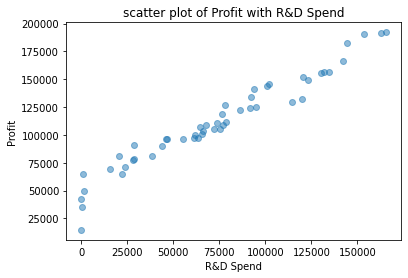

In [46]:
plt.scatter(data['R&D Spend'], data['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

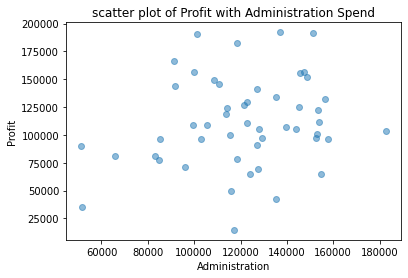

In [47]:
plt.scatter(data['Administration'], data['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with Administration Spend')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

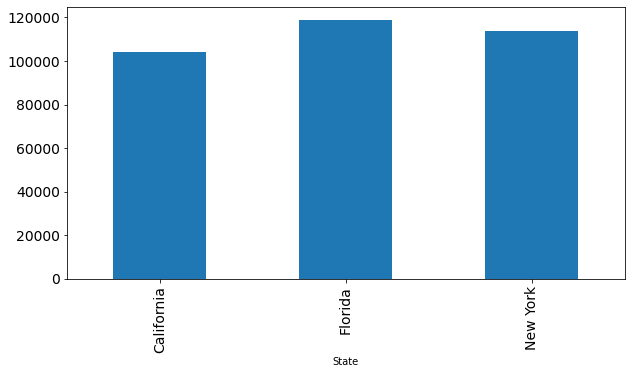

In [48]:
 bar=data.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5), fontsize=14)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [50]:
x=data.iloc[:, :-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [51]:
y=data.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [53]:
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],remainder='passthrough')

In [54]:
x=np.array(ct.fit_transform(x))

In [55]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [57]:
x=x[: ,1:]
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
x_train

array([[1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 0.0, 64664.71, 139553.16, 137962.

In [60]:
model=LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [63]:
model.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [64]:
model.intercept_

42554.167617767

In [66]:
y_pred=model.predict(x_test)

In [67]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [68]:
R2_score=r2_score(y_test,y_pred)
R2_score

0.9347068473282987

In [72]:
y_pred=model.predict([[0.0, 1.0, 114523.61, 122616.84, 261776.23]])

In [73]:
print(y_pred)

[145449.63178399]
